In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [4]:
# Load the data
df = pd.read_csv("../dataset/data_cleaned.csv")

# Display the first few rows of the dataset
df.head()

,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,Jarak (KM)
0,34000.0,960.0,34960.0,400000.0,1.00,1042.297394
1,28000.0,500.0,28500.0,200000.0,0.50,55.550328
2,19000.0,0.0,19000.0,15000.0,0.15,59.972951
3,17000.0,1920.0,18920.0,800000.0,2.60,12.435856
4,18500.0,500.0,19000.0,200000.0,1.00,123.701070


In [5]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Print the normalized data
print(df_scaled)

      Bea Dasar      Htnb     Total  Harga Barang  Berat Kiriman  Jarak (KM)
0      0.013818  0.026667  0.014135      0.026667       0.008333    0.434647
1      0.010747  0.013889  0.010870      0.013333       0.004167    0.018196
2      0.006141  0.000000  0.006067      0.001000       0.001250    0.020063
3      0.005118  0.053333  0.006026      0.053333       0.021667    0.000000
4      0.005885  0.013889  0.006067      0.013333       0.008333    0.046959
...         ...       ...       ...           ...            ...         ...
3427   0.001024  0.000000  0.001011      0.001033       0.000417    0.046959
3428   0.001535  0.000000  0.001517      0.001500       0.000417    0.010468
3429   0.002047  0.000000  0.002022      0.002567       0.001083    0.037438
3430   0.000000  0.000000  0.000000      0.001000       0.000417    0.000000
3431   0.001024  0.000000  0.001011      0.000720       0.001000    0.046959

[3432 rows x 6 columns]


In [6]:
# Features and target
X = df_scaled[['Harga Barang', 'Berat Kiriman', 'Jarak (KM)', 'Htnb']]
y = df_scaled['Bea Dasar']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Text(0.5, 1.0, 'Harga Barang vs Bea Dasar')

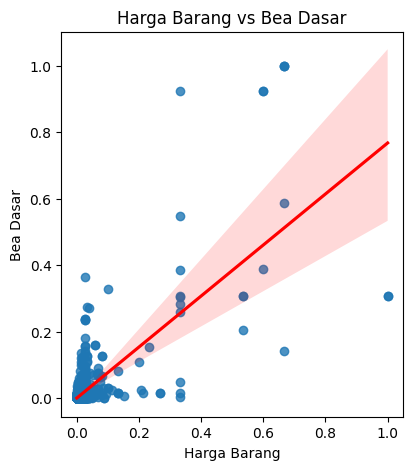

In [7]:
# Visualization
plt.figure(figsize=(15, 5))

# Plot 1: Harga Barang vs Bea Dasar
plt.subplot(1, 3, 1)
sns.regplot(x='Harga Barang', y='Bea Dasar', data=df_scaled, line_kws={"color": "red"})
plt.title('Harga Barang vs Bea Dasar')

Text(0.5, 1.0, 'Berat Kiriman vs Bea Dasar')

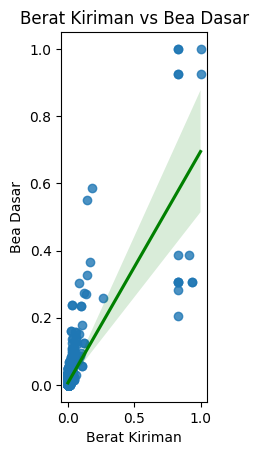

In [8]:
# Plot 2: Berat Kiriman vs Bea Dasar
plt.subplot(1, 3, 2)
sns.regplot(x='Berat Kiriman', y='Bea Dasar', data=df_scaled, line_kws={"color": "green"})
plt.title('Berat Kiriman vs Bea Dasar')

Text(0.5, 1.0, 'Jarak (KM) vs Bea Dasar')

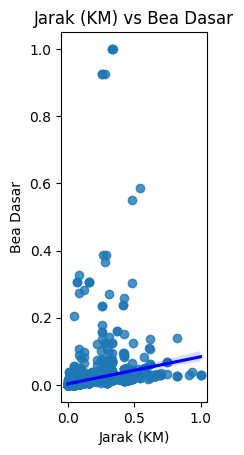

In [9]:
# Plot 3: Jarak (KM) vs Bea Dasar
plt.subplot(1, 3, 3)
sns.regplot(x='Jarak (KM)', y='Bea Dasar', data=df_scaled, line_kws={"color": "blue"})
plt.title('Jarak (KM) vs Bea Dasar')

In [22]:
# Membuat model Random Forest model
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
# Melatih model
modelRF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Membuat model regresi linier
modelRL = LinearRegression()
# Melatih model
modelRL.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the target on the test data
y_pred_rf = modelRF.predict(X_test)

# Memprediksi bea dasar pada data uji
y_pred_rl = modelRL.predict(X_test)

In [19]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Regressor")
print(f"Mean Squared Error (MSE): {mse_rf:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.3f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.3f}")
print(f"R-squared (R²): {r2_rf:.3f}")


Random Forest Regressor
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.013
Mean Absolute Error (MAE): 0.003
R-squared (R²): 0.915


In [21]:
mse_rl = mean_squared_error(y_test, y_pred_rl)
r2_rl = r2_score(y_test, y_pred_rl)
mae_rl = mean_absolute_error(y_test, y_pred_rl)
rmse_rl = np.sqrt(mse_rl)

print("Linear Regression")
print(f"Mean Squared Error (MSE): {mse_rl:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rl:.3f}")
print(f"Mean Absolute Error (MAE): {mae_rl:.3f}")
print(f"R-squared (R²): {r2_rl:.3f}")

Linear Regression
Mean Squared Error (MSE): 0.001
Root Mean Squared Error (RMSE): 0.024
Mean Absolute Error (MAE): 0.007
R-squared (R²): 0.706


In [28]:
# Simulated metrics for Random Forest (RF) and Regression (RL)
metrics_rf = {
    "MSE": mse_rf,  # mean_squared_error for Random Forest
    "R^2": r2_rf,  # r2_score for Random Forest
    "MAE": mae_rf,   # mean_absolute_error for Random Forest
    "RMSE": np.sqrt(rmse_rl)  # RMSE for Random Forest
}

metrics_rl = {
    "MSE": mse_rl,  # mean_squared_error for Regression
    "R^2": r2_rl,  # r2_score for Regression
    "MAE": mae_rl,   # mean_absolute_error for Regression
    "RMSE": np.sqrt(rmse_rf)  # RMSE for Regression
}

# Create lists of metrics for both models
metrics_names = ["MSE", "R^2", "MAE", "RMSE"]
metrics_rf_values = [metrics_rf[metric] for metric in metrics_names]
metrics_rl_values = [metrics_rl[metric] for metric in metrics_names]

# Create a bar chart to compare the metrics
x = np.arange(len(metrics_names))  # the label locations
width = 0.35  # width of the bars



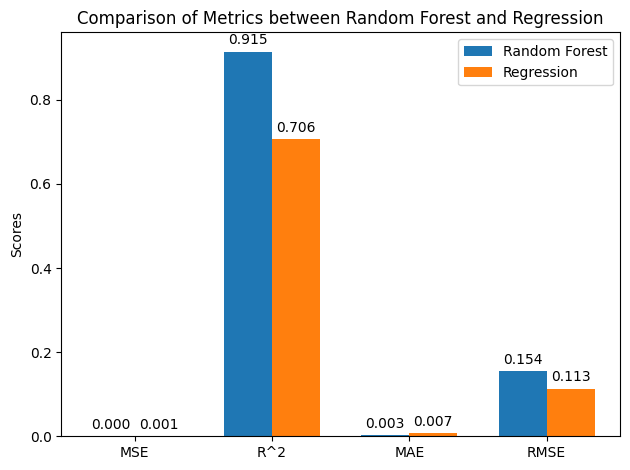

In [34]:
# Adding labels on top of each bar
def add_labels(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Redraw the plot with labels
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, metrics_rf_values, width, label='Random Forest')
rects2 = ax.bar(x + width/2, metrics_rl_values, width, label='Regression')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics between Random Forest and Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Call the function to add labels to each set of bars
add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

# Display the bar chart with labels
plt.show()
